In [ ]:
#libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#your path to the initial file with \\

df = pd.read_csv("C:\homework\DM_II\project\sequential_pattern\\dm2_data.csv")
d=df.copy()
d.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
df=df.drop(['Unnamed: 15'], axis=1)
df=df.drop(['Unnamed: 16'], axis=1)

In [ ]:
df.dropna(axis = 0, how='any', inplace = True)

In [ ]:
#d.info()

In [ ]:
#df.info()

In [ ]:
#df=df.drop(['Date'], axis=1)
#df=df.drop(['Time'], axis=1)
df = df[['PT08.S1(CO)', 'RH']]

In [ ]:
df.head()

,PT08.S1(CO),RH
0,1360.0,48.9
1,1292.0,47.7
2,1402.0,54.0
3,1376.0,60.0
4,1272.0,59.6


In [ ]:
df['co'] = df['PT08.S1(CO)']
del df['PT08.S1(CO)']

In [ ]:
df['rh'] = df['RH']
del df['RH']

In [ ]:
df = df[~((df['rh'] == -200) | (df['co'] == -200))]

In [ ]:
df.head()

,co,rh
0,1360.0,48.9
1,1292.0,47.7
2,1402.0,54.0
3,1376.0,60.0
4,1272.0,59.6


In [ ]:
df.to_csv('C:\homework\DM_II\project\outliers\\data_for_task4.csv', index=False)

## Mahalanobis

In [ ]:
df = pd.read_csv('C:\homework\DM_II\project\outliers\\data_for_task4.csv', skipinitialspace=True, 
                 sep=',')
df.head()

,co,rh
0,1360.0,48.9
1,1292.0,47.7
2,1402.0,54.0
3,1376.0,60.0
4,1272.0,59.6


Populating the interactive namespace from numpy and matplotlib


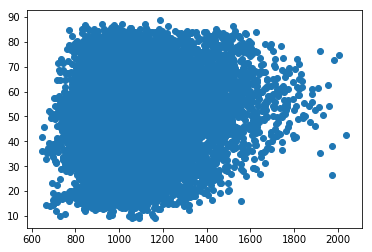

In [ ]:
%pylab inline


# as column vectors
x = df['co']
y = df['rh']
# examine the shape of the numpy arrays
#print x, y
x.shape
y.shape

plot(x,y,'o')

In [ ]:
covariance_xy = np.cov(x, y, rowvar=0)
inv_covariance_xy = np.linalg.inv(covariance_xy)

# Examine inverse covariance matrix and shape
"Covariance\n", covariance_xy
"Inverse Cov.:\n", inv_covariance_xy

('Inverse Cov.:\n', array([[ 2.15031580e-05, -3.08928879e-05],
        [-3.08928879e-05,  3.37910823e-03]]))

In [ ]:
xy_mean = np.mean(x),np.mean(y)
x_diff = np.array([x_i - xy_mean[0] for x_i in x])
y_diff = np.array([y_i - xy_mean[1] for y_i in y])
x_diff.shape

(8991,)

In [ ]:
diff_xy = np.transpose([x_diff, y_diff])
diff_xy.shape, diff_xy[0:5]

((8991, 2), array([[260.1668335 ,  -0.33420087],
        [192.1668335 ,  -1.53420087],
        [302.1668335 ,   4.76579913],
        [276.1668335 ,  10.76579913],
        [172.1668335 ,  10.36579913]]))

In [ ]:
np.transpose(diff_xy[1]).shape
inv_covariance_xy.shape
diff_xy.shape


(8991, 2)

In [ ]:
md = []
for i in range(len(diff_xy)):
    md.append(np.sqrt(np.dot(np.dot(np.transpose(diff_xy[i]),inv_covariance_xy),diff_xy[i])))
md[0:5]

[1.2088131022663362,
 0.9056710692919766,
 1.396823170496488,
 1.359394535594461,
 0.9435055881055419]

In [ ]:
def MahalanobisDist(x, y):
    covariance_xy = np.cov(x,y, rowvar=0)
    inv_covariance_xy = np.linalg.inv(covariance_xy)
    xy_mean = np.mean(x),np.mean(y)
    x_diff = np.array([x_i - xy_mean[0] for x_i in x])
    y_diff = np.array([y_i - xy_mean[1] for y_i in y])
    diff_xy = np.transpose([x_diff, y_diff])
    
    md = []
    for i in range(len(diff_xy)):
        md.append(np.sqrt(np.dot(np.dot(np.transpose(diff_xy[i]),inv_covariance_xy),diff_xy[i])))
    return md

In [ ]:
MahalanobisDist(x,y)[0:5]

[1.2088131022663362,
 0.9056710692919766,
 1.396823170496488,
 1.359394535594461,
 0.9435055881055419]

In [ ]:
# A slightly naive approach: threshold = 1.5 * mean Mahalanobis distance in the dataset
def MD_removeOutliers(x, y):
    MD = MahalanobisDist(x, y)
    threshold = np.mean(MD)*1.5 # adjust 1.5 accordingly 
    nx, ny, outliers = [], [], []
    for i in range(len(MD)):
        if MD[i] <= threshold:
            nx.append(x[i])
            ny.append(y[i])
        else:
            outliers.append(i) # position of removed pair
    return (np.array(nx), np.array(ny), np.array(outliers))

In [ ]:
outliers

array([  25,   26,   50,   53,   73,   74,   75,   97,   98,  110,  111,
        112,  120,  121,  122,  136,  137,  139,  147,  159,  166,  168,
        169,  170,  171,  182,  183,  184,  190,  192,  193,  194,  206,
        207,  241,  242,  470,  471,  472,  493,  518,  526,  550,  551,
        574,  611,  634,  635,  694,  837,  838,  839,  850,  857,  860,
        862,  863,  942,  971,  981,  982, 1019, 1026, 1027, 1028, 1029,
       1030, 1138, 1149, 1150, 1151, 1162, 1163, 1173, 1174, 1198, 1282,
       1283, 1376, 1426, 1462, 1475, 1480, 1619, 1643, 1667, 1797, 1937,
       2778, 2802, 3079, 3871, 3872, 3873, 3874, 3875, 4245, 4748, 4749,
       4750, 4771, 4772, 4773, 4844, 4845, 4867, 4868, 4869, 4893, 4894,
       4906, 4915, 4917, 4918, 4929, 4965, 5092, 5194, 5218, 5221, 5222,
       5223, 5227, 5228, 5229, 5230, 5252, 5253, 5275, 5276, 5277, 5347,
       5348, 5349, 5350, 5370, 5371, 5372, 5373, 5419, 5438, 5440, 5536,
       5539, 5540, 5541, 5542, 5587, 5588, 5603, 56

In [ ]:
'x:', x
'y:', y
MD_removeOutliers(x,y)

(array([1360., 1292., 1402., ..., 1314., 1163., 1142.]),
 array([48.9, 47.7, 54. , ..., 29.3, 23.7, 18.3]),
 array([  20,   24,   25, ..., 8969, 8989, 8990]))

In [ ]:
DF_diff_xy = pd.DataFrame(diff_xy)
DF_diff_xy.rename(columns = lambda x: str(x), inplace=True)
DF_diff_xy.rename(columns={"0": "X"}, inplace=True) # rename a dfcolumn   
DF_diff_xy.rename(columns={"1": "Y"}, inplace=True) # rename a dfcolumn 
DF_diff_xy.head()

,X,Y
0,260.166834,-0.334201
1,192.166834,-1.534201
2,302.166834,4.765799
3,276.166834,10.765799
4,172.166834,10.365799


In [ ]:
from scipy.stats import chi2

# Print the probability that Mahalanobis distance can be >= than the value for each point
# Typical approach: outliers <=> probability < 0.05 (or something small like that)

prob_larger = 1 - chi2.cdf(MahalanobisDist(x,y), 2) # NOTICE: 2 = dimensionality of the dataset

my_table = pd.DataFrame(np.vstack([x,y,prob_larger]))
my_table.rename(index={0: "X", 1: "Y", 2: "Prob"}, inplace=True)
my_table

,0,1,2,3,4,5,6,7,8,9,...,8981,8982,8983,8984,8985,8986,8987,8988,8989,8990
X,1360.000000,1292.000000,1402.000000,1376.00000,1272.000000,1197.000000,1185.000000,1136.000000,1094.000000,1010.000000,...,888.000000,1031.000000,1384.000000,1446.000000,1297.000000,1314.000000,1163.000000,1142.000000,1003.000000,1071.0000
Y,48.900000,47.700000,54.000000,60.00000,59.600000,59.200000,56.800000,60.000000,59.700000,60.200000,...,59.900000,63.100000,61.900000,48.900000,36.300000,29.300000,23.700000,18.300000,13.500000,13.1000
Prob,0.546399,0.635823,0.497375,0.50677,0.623908,0.707531,0.757145,0.730132,0.736362,0.670167,...,0.543293,0.637536,0.488236,0.447632,0.535658,0.447037,0.461738,0.400326,0.354463,0.3518


In [ ]:
# A slightly bettr approach -- check probability that the Mahalanobis distance is "normal"
from scipy.stats import chi2
def MD_removeOutliers_better(x, y, threshold=0.3):
    MD = MahalanobisDist(x, y)
    prob_larger = 1 - chi2.cdf(MahalanobisDist(x,y), 2) # NOTICE: 2 = dimensionality of the dataset
    nx, ny, outliers = [], [], []
    for i in range(len(MD)):
        if prob_larger[i] > threshold: # the point is normal
            nx.append(x[i])
            ny.append(y[i])
        else:
            outliers.append(i) # position of removed pair
    return (np.array(nx), np.array(ny), np.array(outliers))

In [ ]:
outliers

array([  25,   26,   50,   53,   73,   74,   75,   97,   98,  110,  111,
        112,  120,  121,  122,  136,  137,  139,  147,  159,  166,  168,
        169,  170,  171,  182,  183,  184,  190,  192,  193,  194,  206,
        207,  241,  242,  470,  471,  472,  493,  518,  526,  550,  551,
        574,  611,  634,  635,  694,  837,  838,  839,  850,  857,  860,
        862,  863,  942,  971,  981,  982, 1019, 1026, 1027, 1028, 1029,
       1030, 1138, 1149, 1150, 1151, 1162, 1163, 1173, 1174, 1198, 1282,
       1283, 1376, 1426, 1462, 1475, 1480, 1619, 1643, 1667, 1797, 1937,
       2778, 2802, 3079, 3871, 3872, 3873, 3874, 3875, 4245, 4748, 4749,
       4750, 4771, 4772, 4773, 4844, 4845, 4867, 4868, 4869, 4893, 4894,
       4906, 4915, 4917, 4918, 4929, 4965, 5092, 5194, 5218, 5221, 5222,
       5223, 5227, 5228, 5229, 5230, 5252, 5253, 5275, 5276, 5277, 5347,
       5348, 5349, 5350, 5370, 5371, 5372, 5373, 5419, 5438, 5440, 5536,
       5539, 5540, 5541, 5542, 5587, 5588, 5603, 56

In [ ]:
xok, yok, outliers = MD_removeOutliers_better(x,y,0.01) # We use a large threshold to get some outliers...
xok, yok
x[outliers], y[outliers]

(Series([], Name: co, dtype: float64), Series([], Name: rh, dtype: float64))

Populating the interactive namespace from numpy and matplotlib


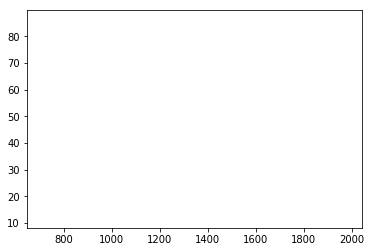

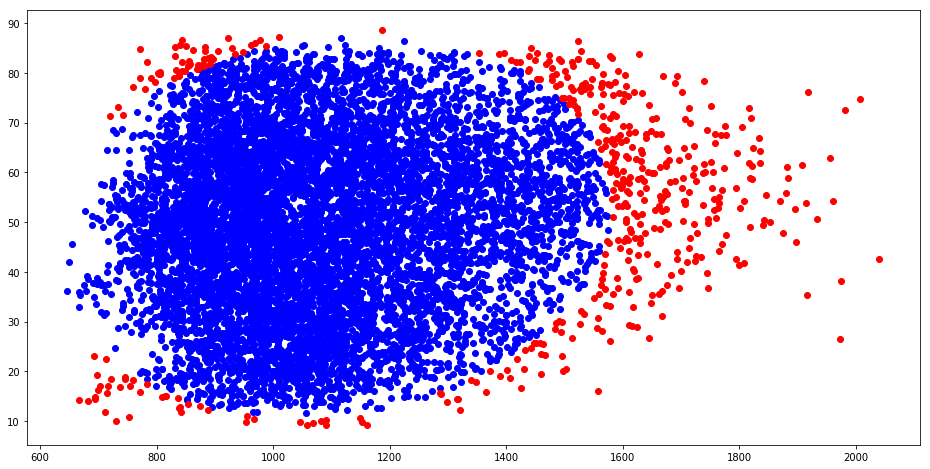

In [ ]:
%pylab inline
xok, yok, outliers = MD_removeOutliers_better(x,y,0.33)

xlim(min(x)-1, max(x)+1)
ylim(min(y)-1, max(y)+1)

plt.figure(figsize=(16, 8))
plot(xok,yok,'bo')
if outliers.any():
    plot(x[outliers], y[outliers],'ro')


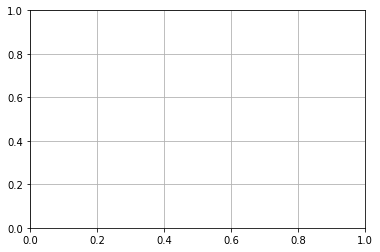

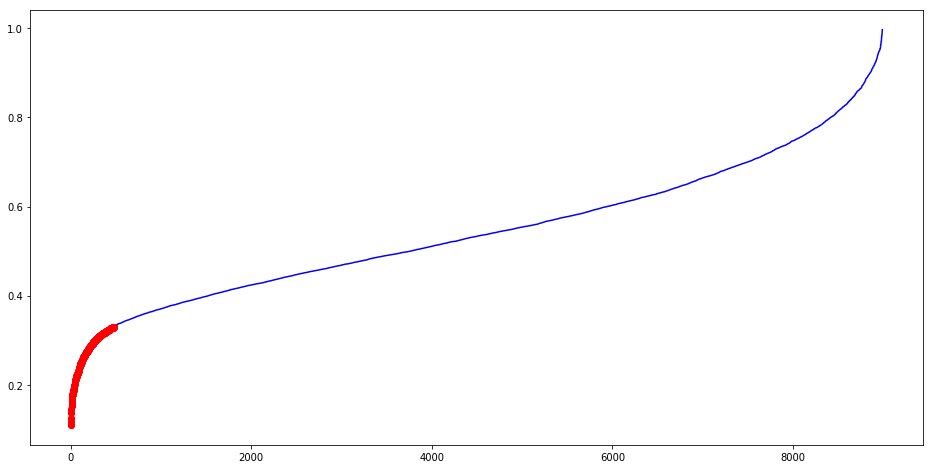

In [ ]:
prob_larger = 1 - chi2.cdf(MahalanobisDist(x,y), 2)

grid()
plt.figure(figsize=(16, 8))
plot(sort(prob_larger), "b-") # All dataset
plot(sort(prob_larger[prob_larger<0.33]), "ro") # Red points = outliers with threshold = 0.33